# Responsi Praktikum Bigdata & Data Mining
 
 Rule:


1.   Kerjakan Secara individu, Plagiarism==0
2.   Rename nama File IPYNB dengan menambahkan 4 Digit nim terakhir anda
3. Tulis identitas anda(Nim, Nama & kelas) pada file IPynb anda
4. Setelah selesai, letakkan file anda pada desktop
5. File akan di collect secara otomatis ketika waktu pengerjaan telah berakhir
6. durasi pengerjaan 60 Menit
7. Gunakan Dataset berikut ini: https://drive.google.com/file/d/1nd_lh73NTFvptUuKaAAhWhcDwR6FFCPZ/view?usp=share_link



# Identitas


*   Nim: 20.11.3714
*   Nama: Muhammad Bastian Hanafi
*   Kelas: 20 IF 07




1. Tampilkan dataset dalam bentuk dataframe.
Link dataset:

In [101]:
import pandas as pd

In [102]:
# read csv from google drive
url = 'https://drive.google.com/file/d/1nd_lh73NTFvptUuKaAAhWhcDwR6FFCPZ/view?usp=share_link'
id_file = url.split('/')[-2]
baseurl = 'https://drive.google.com/uc?id=' + id_file
df = pd.read_csv(baseurl)
df1= pd.read_csv(baseurl)
df

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09
...,...,...,...,...,...,...,...,...
7801,dash,Brown Butter-Sunchoke Soup With Brussels Sprou...,italian,85.20,288.14,137.15,2022-10-16,20:40:44
7802,dash,Make-Your-Own-Salad,american,141.98,123.18,323.50,2022-10-16,20:40:44
7803,dash,Luis Buñuel Dry Martini,world,0.01,0.39,0.00,2022-10-16,20:40:44
7804,dash,Cornflake Semi-Fried Chicken Tenders,american,155.38,239.88,260.84,2022-10-16,20:40:44


2. Adakah data kosong dari dataset tersebut? Jika ada Lakukan penanganan terhadap data kosong tersebut,Beri Penjelasan !

In [61]:
df.isnull().sum()

Diet_type          0
Protein(g)         0
Carbs(g)           0
Fat(g)             0
Extraction_day     0
Extraction_time    0
dtype: int64

pada dataset yang di berikan tidak ada data kosong

3. Adakah Outlier dari dataset Anda?Jika Ada Lakukan Penanganan terhadap outlier tersebut?, Beri Penjelasan!

In [9]:
import matplotlib.pyplot as plt

melihat tipedata pada setiap fitur

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diet_type        7806 non-null   object 
 1   Recipe_name      7806 non-null   object 
 2   Cuisine_type     7806 non-null   object 
 3   Protein(g)       7806 non-null   float64
 4   Carbs(g)         7806 non-null   float64
 5   Fat(g)           7806 non-null   float64
 6   Extraction_day   7806 non-null   object 
 7   Extraction_time  7806 non-null   object 
dtypes: float64(3), object(5)
memory usage: 488.0+ KB


menampilkan data ke grafik 

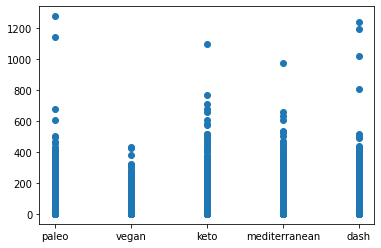

In [68]:
plt.scatter(df1['Diet_type'],df1['Protein(g)'])


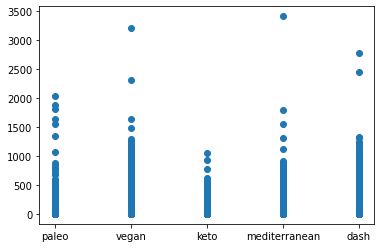

In [69]:
plt.scatter(df1['Diet_type'],df1['Carbs(g)'])


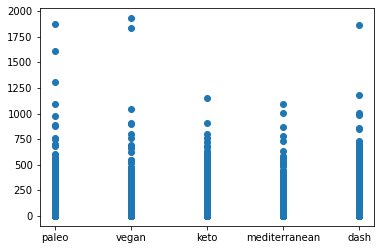

In [70]:
plt.scatter(df1['Diet_type'],df1['Fat(g)'])

In [103]:
from scipy import stats

mencari z-score dari setiap fitur

In [104]:
zProtein = stats.zscore(df['Protein(g)'])
zCrabs = stats.zscore(df['Carbs(g)'])
zFat = stats.zscore(df['Fat(g)'])

In [105]:
print(zProtein)
print(zCrabs)
print(zFat)

0      -0.868807
1       1.094964
2      -0.582700
3      -0.819804
4      -0.483247
          ...   
7801    0.021923
7802    0.654277
7803   -0.926830
7804    0.803511
7805   -0.926719
Name: Protein(g), Length: 7806, dtype: float64
0      -0.811387
1      -0.664369
2       0.809416
3      -0.410678
4      -0.527410
          ...   
7801    0.731685
7802   -0.155696
7803   -0.816229
7804    0.472076
7805   -0.813862
Name: Carbs(g), Length: 7806, dtype: float64
0      -0.934788
1       0.235985
2      -0.168470
3      -0.470460
4      -0.374956
          ...   
7801    0.162351
7802    1.688680
7803   -0.960998
7804    1.175453
7805   -0.960998
Name: Fat(g), Length: 7806, dtype: float64


karena ada z score yang negatif maka perlu di cari nilai absolute nya sehingga semua bernilai positif

In [106]:
zProtein = np.abs(zProtein)
zCrabs = np.abs(zCrabs)
zFat = np.abs(zFat)
print(zProtein)
print(zCrabs)
print(zFat)

0       0.868807
1       1.094964
2       0.582700
3       0.819804
4       0.483247
          ...   
7801    0.021923
7802    0.654277
7803    0.926830
7804    0.803511
7805    0.926719
Name: Protein(g), Length: 7806, dtype: float64
0       0.811387
1       0.664369
2       0.809416
3       0.410678
4       0.527410
          ...   
7801    0.731685
7802    0.155696
7803    0.816229
7804    0.472076
7805    0.813862
Name: Carbs(g), Length: 7806, dtype: float64
0       0.934788
1       0.235985
2       0.168470
3       0.470460
4       0.374956
          ...   
7801    0.162351
7802    1.688680
7803    0.960998
7804    1.175453
7805    0.960998
Name: Fat(g), Length: 7806, dtype: float64


In [107]:
# seleksi data
outlierZProtein = np.where(zProtein > 3.000)
outlierZCrabs = np.where(zCrabs > 3.000)
outlierZFat = np.where(zFat > 3.000)
# melihat jumlah outlier data

konversi hasil seleksi data ke list

In [108]:
outlierZProteinconvertToList = outlierZProtein[0].tolist()
outlierZCrabsconvertToList = outlierZCrabs[0].tolist()
outlierZFatconvertToList = outlierZProtein[0].tolist()

jumlah data sebelum di remove outlier

In [109]:
df.count()

Diet_type          7806
Recipe_name        7806
Cuisine_type       7806
Protein(g)         7806
Carbs(g)           7806
Fat(g)             7806
Extraction_day     7806
Extraction_time    7806
dtype: int64

In [113]:
df1.drop(outlierZProteinconvertToList, axis=0, inplace=True)

jumlah data setelah remove outlier

In [114]:
df1.count()

Diet_type          7687
Recipe_name        7687
Cuisine_type       7687
Protein(g)         7687
Carbs(g)           7687
Fat(g)             7687
Extraction_day     7687
Extraction_time    7687
dtype: int64

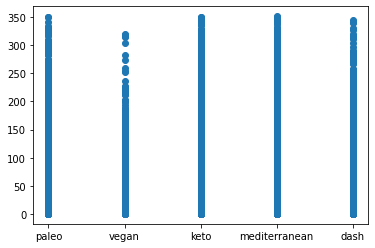

In [115]:
plt.scatter(df1['Diet_type'],df1['Protein(g)'])

In [ ]:
df.drop(convertToList, axis=0, inplace=True)

4. Dengan Menggunakan Konsep Regresi, dataset tersebut bisa digunakan untuk apa?

dataset tersebut bisa di gunakan untuk memperediksi atau menentukan makanan yang cocok berdasarkan tipe diet yang di jalani

5. Lakukan Feature selection untuk mendukung mendukung proses mining soal nomor 4. Lakukan Setidaknya dengan 3 Metode. Kemudian Pilih yang 1 hasil yang terbaik menurut Anda, jelaskan kenapa anda memilih hasil tersebut. Gunakan Hasil Pilihan Anda untuk mengerjakan Soal Nomor 6

In [16]:
# filter method
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
df.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diet_type        7806 non-null   object 
 1   Recipe_name      7806 non-null   object 
 2   Cuisine_type     7806 non-null   object 
 3   Protein(g)       7806 non-null   float64
 4   Carbs(g)         7806 non-null   float64
 5   Fat(g)           7806 non-null   float64
 6   Extraction_day   7806 non-null   object 
 7   Extraction_time  7806 non-null   object 
dtypes: float64(3), object(5)
memory usage: 488.0+ KB


In [38]:
columns = ['Recipe_name', 'Cuisine_type']
df.drop(columns, inplace=True, axis=1)

In [40]:
cols =['Diet_type','Extraction_day','Extraction_time']
for col in cols:
    df[col]=le.fit_transform(df[col])

In [41]:
df.head()

,Diet_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,3,5.22,1.29,3.20,0,91
1,3,181.55,28.62,146.14,0,91
2,3,30.91,302.59,96.76,0,91
3,3,9.62,75.78,59.89,0,91
4,3,39.84,54.08,71.55,0,91


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diet_type        7806 non-null   int64  
 1   Protein(g)       7806 non-null   float64
 2   Carbs(g)         7806 non-null   float64
 3   Fat(g)           7806 non-null   float64
 4   Extraction_day   7806 non-null   int64  
 5   Extraction_time  7806 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 366.0 KB


In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

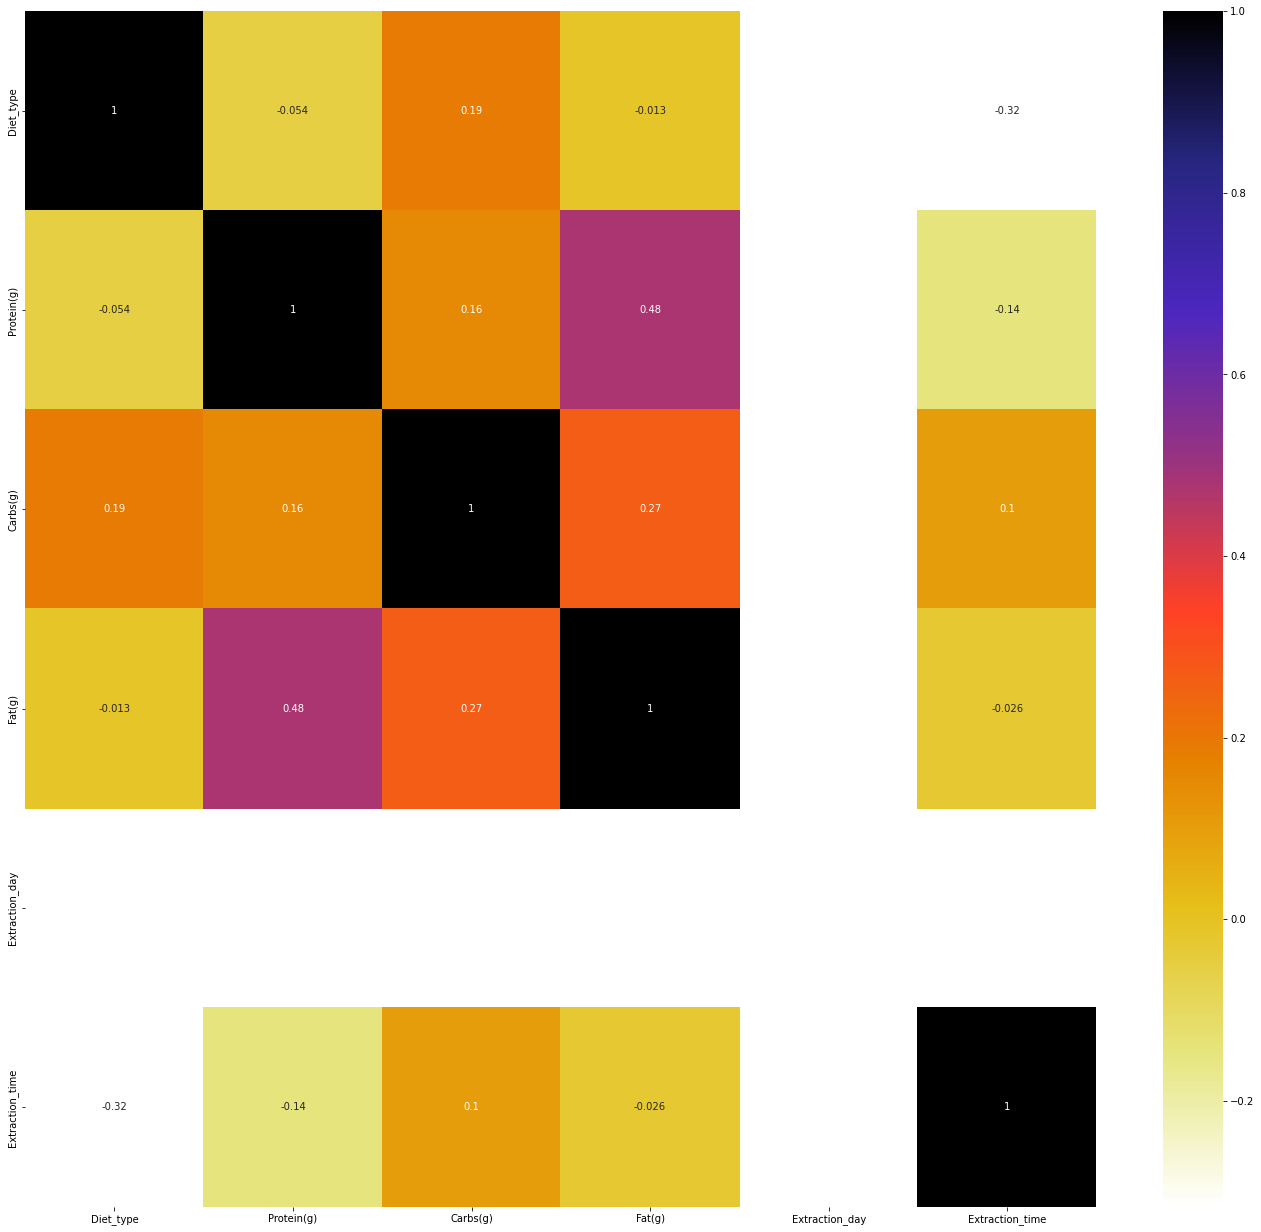

In [44]:
cor = df.corr()
plt.figure(figsize=(24,22))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

In [49]:
cor_target = abs(cor['Diet_type'])
relevant_features = cor_target[cor_target>0.3]
relevant_features

Diet_type          1.000000
Extraction_time    0.316714
Name: Diet_type, dtype: float64

In [50]:
# forward method
import warnings
warnings.filterwarnings('ignore')

In [51]:
X = df.drop("Diet_type",1)
y = df["Diet_type"]

In [54]:
import statsmodels.api as sm

In [55]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [56]:
forward_selection(X,y)

['Extraction_time', 'Carbs(g)', 'Protein(g)', 'Fat(g)']

Embeded method

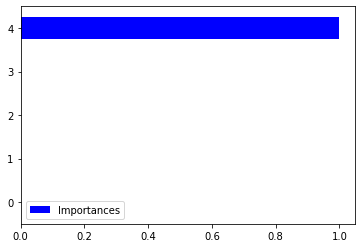

In [57]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=10)

model.fit(X,y)

importances = model.feature_importances_

result_df = pd.DataFrame({'Features':pd.DataFrame(X).columns,'Importances':importances})
result_df.set_index('Importances')

result_df = result_df.sort_values('Importances')
result_df.plot.barh(color = 'blue')

In [58]:
result_df

,Features,Importances
0,Protein(g),0.0
1,Carbs(g),0.0
2,Fat(g),0.0
3,Extraction_day,0.0
4,Extraction_time,1.0


menurut saya hasil terbaik adalah menggunakan metode filter method
karena lebih mudah di baca

6. Buatlah Model dari proses mining yang anda lakukan sesuai dengan jawaban nomor 4